## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

# Pengaplikasian Python dalam Data Analysis

## Tujuan

Setelah menyelesaikan lab ini, kamu akan mampu untuk:
*   Mengunggah dataset dengan `file.upload` dan mengunduh dataset dengan `file.download`
*   Pengelolaan data `date`
*   Penggunaan fungsi `pivot_table` & `groupby`
*   Membuat dan menggunakan fungsi sederhana pada `DataFrame`
*   Membuat visualisasi secara sederhana dengan menggunakan `plot`
*   Menjalankan SQL di Colab dengan `sqlite3`

In [ ]:
#1
#Mengimpor Libraries
import pandas as pd
import numpy as np
from google.colab import files #unggah dan unduh file
import io #membaca data
import sqlite3
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

In [ ]:
#2
#Mengimpor dataset
URL = 'https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/tokopaedi.csv'
df = pd.read_csv(URL)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Mengunggah dan Menggunduh Dataset

In [ ]:
#3
#Mengunggah dataset dengan upload file
unggah = files.upload()

Saving Canada.xlsx to Canada (1).xlsx


In [ ]:
#4
#Membaca dataset
df_unggah = pd.read_excel('Canada.xlsx')
df_unggah

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,International Migration Flows to and from Sele...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,POP/DB/MIG/Flow/Rev.2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#5
#Mengunduh dataset
df_unggah.to_csv('df_unggah.xlsx')
files.download('df_unggah.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#6
#Menampilkan gambaran data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   row_id         9994 non-null   int64  
 1   order_id       9994 non-null   object 
 2   order_date     9994 non-null   object 
 3   ship_date      9994 non-null   object 
 4   ship_mode      9994 non-null   object 
 5   customer_id    9994 non-null   object 
 6   customer_name  9994 non-null   object 
 7   segment        9994 non-null   object 
 8   country        9994 non-null   object 
 9   city           9994 non-null   object 
 10  state          9994 non-null   object 
 11  postal_code    9994 non-null   int64  
 12  region         9994 non-null   object 
 13  product_id     9994 non-null   object 
 14  category       9994 non-null   object 
 15  subcategory    9994 non-null   object 
 16  product_name   9994 non-null   object 
 17  sales          9994 non-null   float64
 18  quantity

## Pengelolaan Data `Date`

In [ ]:
#7
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['ship_date']= pd.to_datetime(df['ship_date'])
df.dtypes

,0
row_id,int64
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
customer_id,object
customer_name,object
segment,object
country,object
city,object


In [ ]:
#8
#Membuat kolom tambahan untuk day, month, month_num
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df['ship_delay'] = df['ship_date']-df['order_date']
df['ship_delay'] = df['ship_delay'].dt.days
df.head(5)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,product_name,sales,quantity,discount,profit,day,month,month_num,year,ship_delay
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Tuesday,November,11,2016,3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7


In [ ]:
# Filter data untuk bulan Oktober 2015
df_october_2015 = df[(df['order_date'].dt.year == 2015) & (df['order_date'].dt.month == 10)]
print("Data untuk Oktober 2015:")
print(df_october_2015)

Data untuk Oktober 2015:
      row_id        order_id order_date  ship_date       ship_mode  \
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
109      110  CA-2015-129476 2015-10-15 2015-10-20  Standard Class   
189      190  CA-2015-102281 2015-10-12 2015-10-14     First Class   
190      191  CA-2015-102281 2015-10-12 2015-10-14     First Class   
...      ...             ...        ...        ...             ...   
9416    9416  CA-2015-127824 2015-10-18 2015-10-22  Standard Class   
9417    9417  CA-2015-127824 2015-10-18 2015-10-22  Standard Class   
9489    9489  CA-2015-156566 2015-10-01 2015-10-04     First Class   
9912    9913  CA-2015-132388 2015-10-10 2015-10-12     First Class   
9913    9914  CA-2015-132388 2015-10-10 2015-10-12     First Class   

     customer_id      customer_name      segment        country  \
3       SO-20335     Sean O'Donnell     Consumer  United States   


##Penggunaan fungsi `pivot_table` & `groupby`

### `pivot_table`

**Formula:**

nama_variable  =  `pd.pivot_table`(nama_dataframe`, values=`['kolom_nilai']`,index=`['baris']`,columns=`['header']`,aggfunc=np.`jenis_agregasi)

Output: `DataFrame`

In [ ]:
#10
df_pivot = pd.pivot_table(df,values=['quantity'],index=['region'],columns=['category'],aggfunc=np.average)
df_pivot

quantity                           
category Furniture Office Supplies Technology
region                                       
Central   3.798337        3.803797   3.676190
East      3.683860        3.774533   3.629907
South     3.888554        3.819095   3.815700
West      3.813296        3.813917   3.898164

In [ ]:
#11
#Buatlah tabel pivot untuk: index = country, header/kolom = city, nilainya = penjumlahan dari profit
# Membuat tabel pivot
pivot_table = df.pivot_table(index='country', columns='city', values='profit', aggfunc='sum', fill_value=0)
print("Tabel Pivot:")
print(pivot_table)

Tabel Pivot:
city           Aberdeen  Abilene     Akron  Albuquerque  Alexandria    Allen  \
country                                                                        
United States      6.63  -3.7584 -186.6356     634.0881    318.6183 -39.8775   

city           Allentown  Altoona  Amarillo    Anaheim  ...  Wilmington  \
country                                                 ...               
United States  -226.4504  -1.1835 -387.9683  1234.0036  ...   1947.7019   

city           Wilson  Woodbury  Woodland  Woodstock  Woonsocket    Yonkers  \
country                                                                       
United States -14.336  196.0962   33.3848    79.9929     78.6791  2767.7557   

city               York  Yucaipa      Yuma  
country                                     
United States -102.1692   13.208 -465.9909  

[1 rows x 531 columns]


### `groupby`

**Formula:**

nama variabel = nama_dataframe`.groupby(by=`['kolom_1'  ,   'kolom_2'])['kolom_agregasi']`.`jenis_agregasi()

Output: `series`


In [ ]:
#12
df_groupby = df.groupby(by=["month_num","month"])["profit"].sum()
df_groupby

,,profit
month_num,month,
1,January,9134.4461
2,February,10294.6107
3,March,28594.6872
4,April,11587.4363
5,May,22411.3078
6,June,21285.7954
7,July,13832.6648
8,August,21776.9384
9,September,36857.4753


In [ ]:
#13
#merubah output groupby menjadi DataFrame dengan as_index = False
df_groupby = df.groupby(by=["month_num","month"], as_index=False)["profit"].sum()
df_groupby

,month_num,month,profit
0,1,January,9134.4461
1,2,February,10294.6107
2,3,March,28594.6872
3,4,April,11587.4363
4,5,May,22411.3078
5,6,June,21285.7954
6,7,July,13832.6648
7,8,August,21776.9384
8,9,September,36857.4753
9,10,October,31784.0413


In [ ]:
#14
#Buatlah dengan fungsi groupby, top 5 city penghasil profit paling besar.
# Groupby city dan hitung total profit
city_profit = df.groupby('city')['profit'].sum().reset_index()

# Urutkan berdasarkan profit secara menurun dan ambil top 5
top_5_cities = city_profit.sort_values(by='profit', ascending=False).head(5)
print("Top 5 Kota Berdasarkan Profit:")
print(top_5_cities)

Top 5 Kota Berdasarkan Profit:
              city      profit
329  New York City  62036.9837
266    Los Angeles  30440.7579
452        Seattle  29156.0967
438  San Francisco  17507.3854
123        Detroit  13181.7908


##Membuat dan menggunakan fungsi sederhana pada DataFrame

Formula:

`def` nama_fungsi `(`nilai`):`

    kondisi



In [ ]:
#15
#Membuat suatu fungsi
def condition(value):
    if value > 2:
      return 'High'
    elif value == 2:
      return 'Medium'
    else:
        return 'Low'

In [ ]:
#16
#Pengaplikasian fungsi
df['status'] = df['quantity'].apply(condition)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,sales,quantity,discount,profit,day,month,month_num,year,ship_delay,status
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,261.9600,2,0.00,41.9136,Tuesday,November,11,2016,3,Medium
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,731.9400,3,0.00,219.5820,Tuesday,November,11,2016,3,High
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,14.6200,2,0.00,6.8714,Sunday,June,6,2016,4,Medium
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,957.5775,5,0.45,-383.0310,Sunday,October,10,2015,7,High
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,22.3680,2,0.20,2.5164,Sunday,October,10,2015,7,Medium


In [ ]:
#17
#Buatlah suatu kolom baru yang bernama ship_delay yang dapat menyatakan bahwa apabila waktu pengiriman <= 4 hari dari tanggal order maka 'Good' selain itu maka 'Bad'
# Hitung selisih hari antara ship_date dan order_date
df['ship_delay'] = (df['ship_date'] - df['order_date']).dt.days

# Buat kolom baru 'ship_delay' berdasarkan kondisi
df['ship_delay'] = df['ship_delay'].apply(lambda x: 'Good' if x <= 4 else 'Bad')
print("Data dengan Kolom Baru 'ship_delay':")
print(df)

Data dengan Kolom Baru 'ship_delay':
      row_id        order_id order_date  ship_date       ship_mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     customer_id     customer_name    segment        country             city  \
0       CG-12520       Claire Gute   Cons

## Membuat visualisasi secara sederhana dengan menggunakan `plot`

<Axes: title={'center': 'Monthly Total Quantity'}, xlabel='Month', ylabel='Total Profit'>

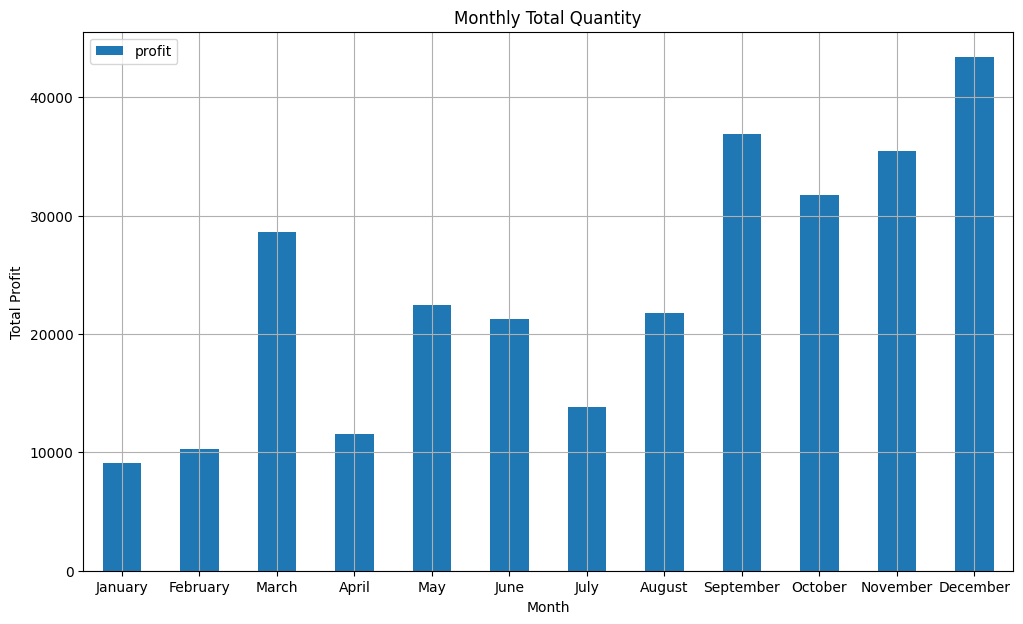

In [ ]:
#18
#Membuat grafik
df_groupby.plot(
    x='month',
    y=['profit'],
    kind='bar',
    grid=True,
    xlabel='Month',
    ylabel='Total Profit',
    figsize=(12,7),
    rot=0,  # Rotasi
    title='Monthly Total Quantity',
    table=False,
    secondary_y=False
)


## Menjalankan SQL di Colab dengan `sqlite3`

In [ ]:
#19
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df.to_sql('tokopaedi',conn, index=False, if_exists='replace')

9994

In [ ]:
#20
#Query SQL
df_sql = pd.read_sql("""
SELECT
    tokopaedi.city,
    sum(tokopaedi.profit) profit
from
    tokopaedi
group by
    1
order by
    2 desc
limit 10
""", conn)
df_sql

,city,profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


Top 5 Kota Berdasarkan Sales pada November 2016:
            city  total_sales
0    Los Angeles    12590.884
1  New York City     5571.304
2      Lancaster     5016.549
3   Philadelphia     3830.670
4          Parma     3588.096


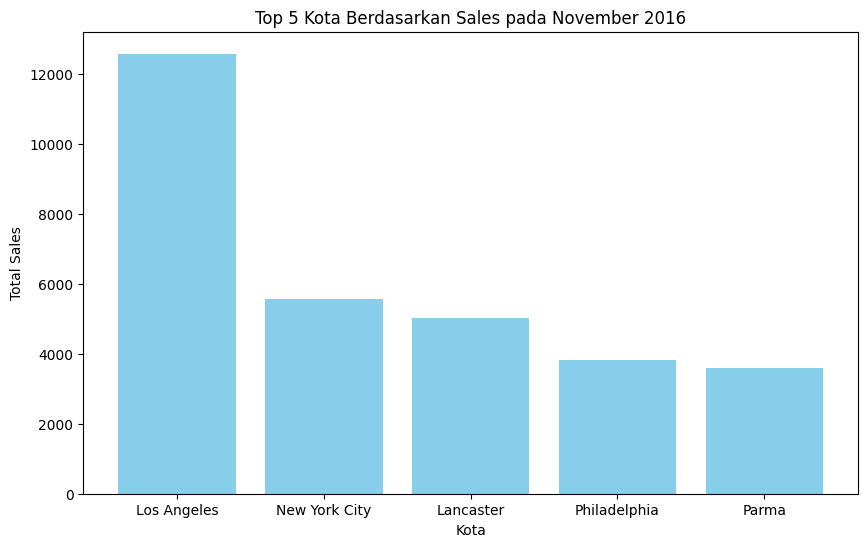

In [ ]:
#21
#Buat top 5 city berdasarkan sales pada bulan November 2016 dengan menggunakan sql

#Kueri untuk SQL mengambil top 5 kota berdasarkan sales pada November 2016
query_sales = """
SELECT city, SUM(sales) AS total_sales
FROM sales_data
WHERE strftime('%Y-%m', order_date) = '2016-11'
GROUP BY city
ORDER BY total_sales DESC
LIMIT 5;
"""

#Kueri untuk menyimpan hasilnya ke DataFrame & menampilkan hasil
top_5_cities_sales = pd.read_sql_query(query_sales, conn)
print("Top 5 Kota Berdasarkan Sales pada November 2016:")
print(top_5_cities_sales)

#Kueri untuk membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities_sales['city'], top_5_cities_sales['total_sales'], color='skyblue')
plt.title('Top 5 Kota Berdasarkan Sales pada November 2016')
plt.xlabel('Kota')
plt.ylabel('Total Sales')
plt.show()

#Minitask

Tampilkan TOP 5 City selama 2016 dengan berdasarkan nilai profit yang paling tinggi. Tampilkan juga dengan bar diagram.

Berikut contoh pengerjaan data yang lain: https://drive.google.com/drive/folders/1panwFfAKVaMzguX1jxxn0bkHaNE5IJFB?usp=sharing